In [6]:
import pandas as pd

In [1]:
docs = ['티트리 오일 - 1L(대용량) / 에센셜오일 원액100%',
 '수려한 비책 진생 3종 스마트 세트',
 '이니스프리 자연발효 에너지 오일(대용량) 60ml / 자연발효 에너지 오일 30ml',
 '티트리오일',
 '[공식수입]트릴로지 오가닉 로즈힙 오일 20ml',
 '비욘드 피토아쿠아 2종 세트 -선물포장',
 '내추럴 발효 동백 오일 100 (20ml)',
 '설화수 자음생2종 기획세트/ 자음생수+자음생유액+샘플',
 '토니모리 더 블랙티 런던 클래식 오일 30ml',
 '에뛰드 수분가득 콜라겐(스킨+로션) 2종세트',
 '참존 디에이지 레드 애디션 2종세트',
 '최신제조 수려한 본 초보습 2종세트 여성 기초 선물용',
 '숨 37도 타임에너지 스킨 리셋팅 2종(단품)',
 '[정품] 메디필 오리지날 동백오일',
 '[메디필] 오리지날 동백 오일 15ml/ 보습오일',
 '메디필 동백오일 오리지날 15ml 광채보습 영양',
 '더후 진율향 3종기획세트/스킨로션크림3종스페셜세트',
 '더후 진율향 진율3종 기초세트 예단화장품 whoo 스킨케어',
 '[innisfree] 이니스프리 올리브 리얼 에센셜 오일 Ex. 30mL',
 '로벡틴 스킨 이센셜즈 배리어 리페어 페이스 오일 30ml']

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
doc_ft = cv.fit_transform(docs)  # 각 문서를 BOW 인코딩 벡터로 변환한다.
doc_ft 

<20x87 sparse matrix of type '<class 'numpy.int64'>'
	with 116 stored elements in Compressed Sparse Row format>

In [3]:
dict = cv.vocabulary_

In [7]:
# TDM (Term Document Matrix) 그리기
word_count = pd.DataFrame(doc_ft.toarray(), columns=cv.get_feature_names()) 
word_count.head()

,100,15ml,1l,20ml,2종,2종세트,30ml,37도,3종,3종기획세트,...,최신제조,콜라겐,클래식,타임에너지,토니모리,트릴로지,티트리,티트리오일,페이스,피토아쿠아
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
from sklearn.feature_extraction.text import TfidfTransformer

In [9]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tv = TfidfVectorizer()

In [12]:
doc_ft = tv.fit_transform(docs)

In [13]:
import numpy as np
word_corr = np.corrcoef(doc_ft.toarray(), rowvar = 0)

In [14]:
import networkx

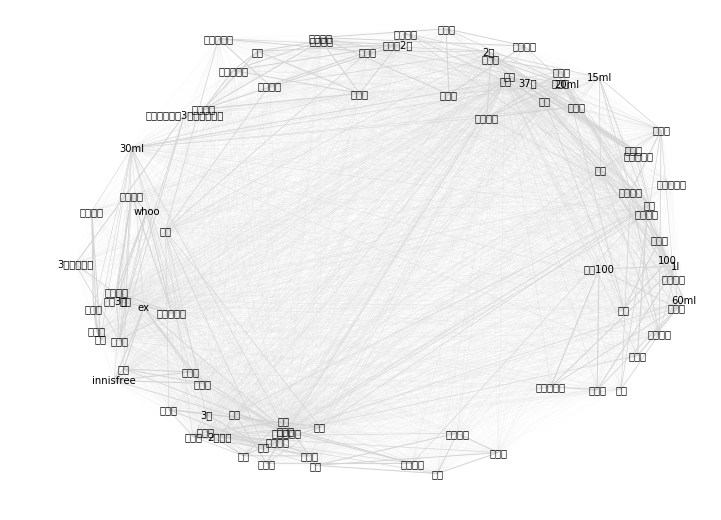

In [20]:
G = networkx.Graph()

edges = []
words = tv.get_feature_names()
len_ = len(words)
for i in range(len_):
    for j in range(i + 1, len(words)):
        edges.append((words[i],words[j],word_corr[i,j]))

edge_list = [(word1,word2) for word1,word2,weight in edges]
weight_list = [weight for _, _, weight in edges]

words = tv.get_feature_names()

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1,word2,weight = weight)
    edge_set.add((word1,word2))

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# path = '/usr/share/fonts/NanumFont/NanumMyeongjo.ttf'
# font_name = fm.FontProperties(fname=path, size=50).get_name()
# print(font_name)
# plt.rc('font', family=font_name)

import warnings
warnings.filterwarnings(action='ignore') 

np.random.seed(13)
position = networkx.spring_layout(G, k = 0.09)
plt.figure(figsize = (12,9))
networkx.draw_networkx_nodes(G, position, node_size = 0, )
networkx.draw_networkx_edges(G, position, edge_list, weight_list, edge_color = 'lightgray')
networkx.draw_networkx_labels(G, position, font_size = 10) #, font_family=font_name
plt.axis('off')
plt.show()
